In [1]:
!pip3 install xgboost

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn import metrics
from lightgbm import LGBMRegressor
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.shape

(1009, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


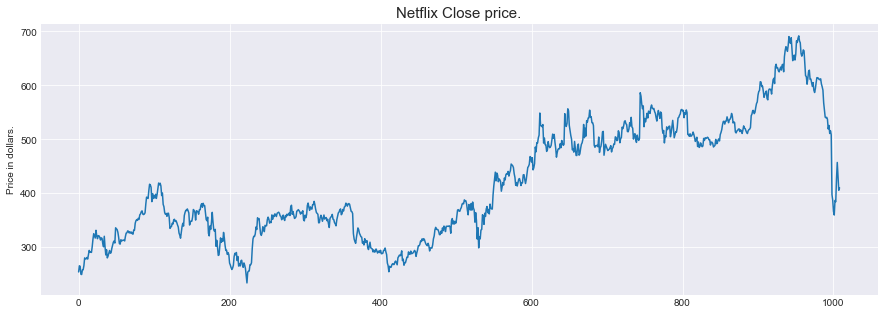

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Netflix Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [10]:
df[df['Close'] == df['Adj Close']].shape

(1009, 7)

In [11]:
df = df.drop(['Adj Close'], axis=1)

In [12]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

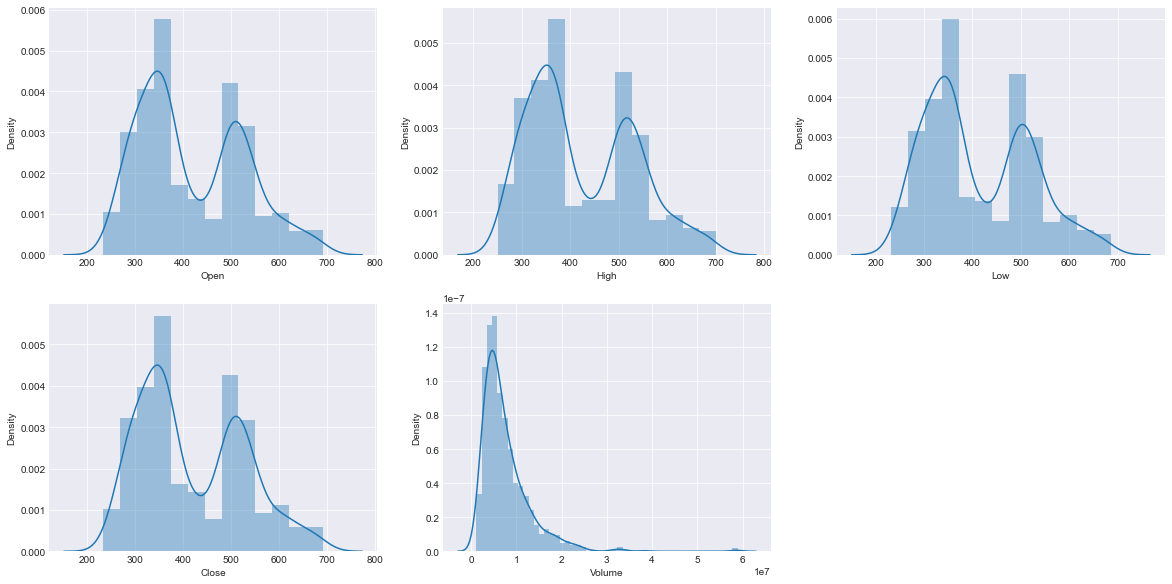

In [13]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

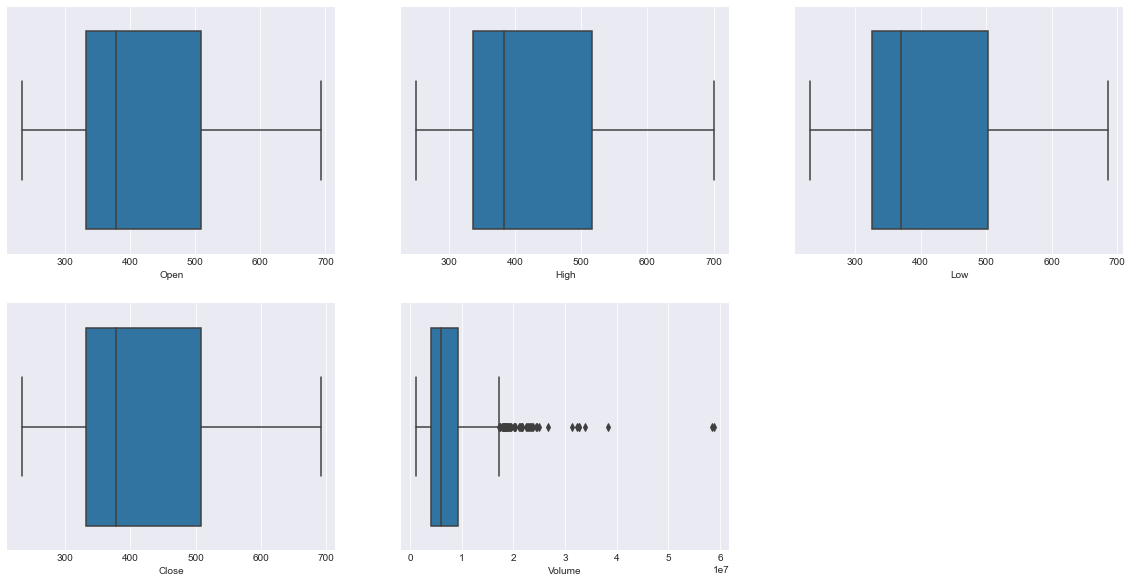

In [14]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

In [15]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2,2018,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2,2018,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2,2018,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2,2018,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2,2018,9


In [16]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2,2018,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2,2018,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2,2018,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2,2018,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2,2018,9,0


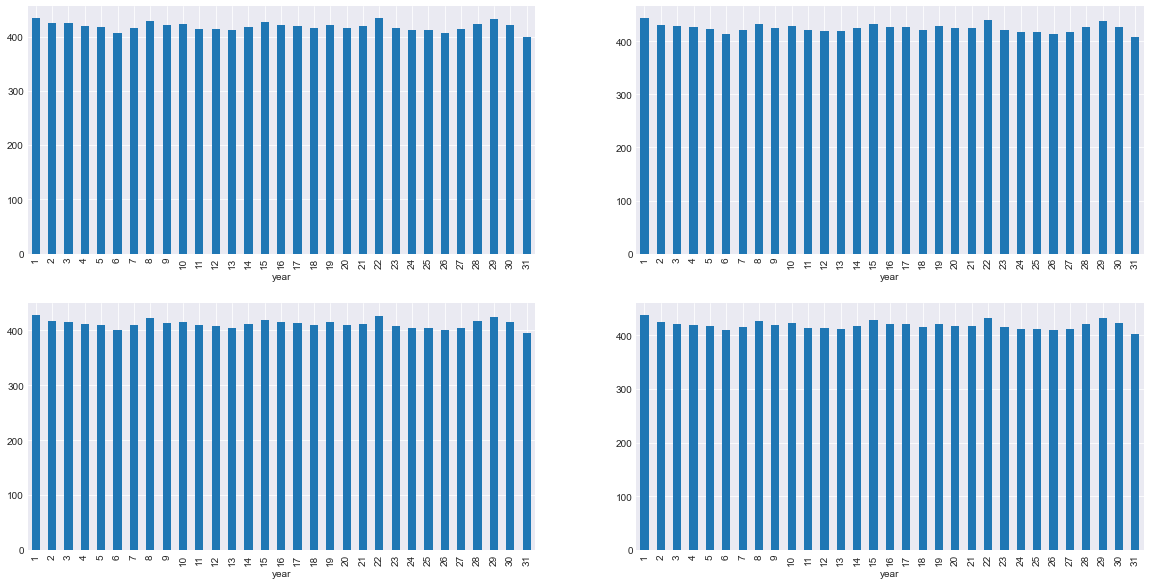

In [17]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [18]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,448.108608,454.981568,440.919864,448.071555,7.315755e+06,6.716235,2019.721692,15.785812
1,341.911595,346.547464,336.562137,341.794528,8.247727e+06,6.072464,2019.260870,15.536232


In [19]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

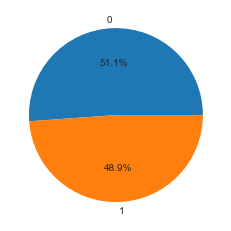

In [20]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

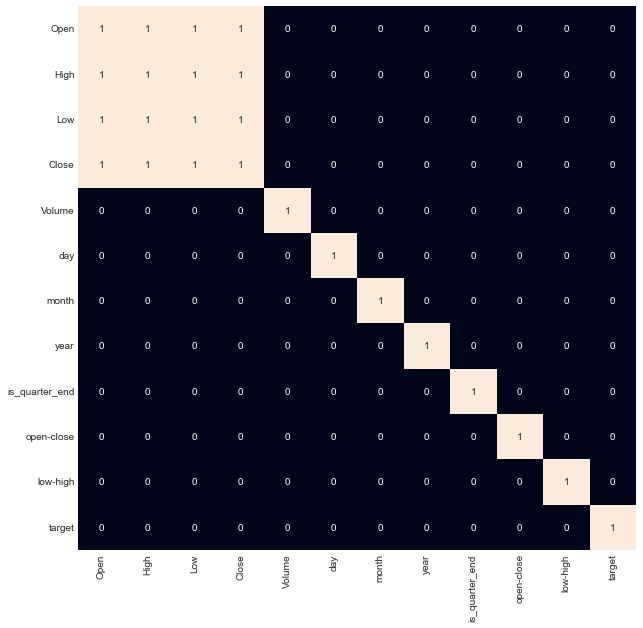

In [21]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [22]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


In [23]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9793346455736192
Validation Accuracy :  0.5964314354450682



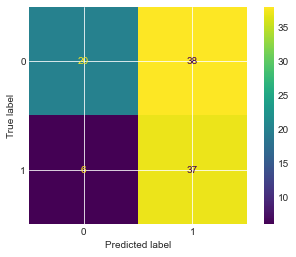

In [24]:
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

In [25]:
# Function to create features and target variable
def create_features_target(dataset, target_column, window_size):
    features = []
    target = []
    for i in range(len(dataset)-window_size):
        feature = dataset[i:i+window_size]
        features.append(feature)
        target.append(dataset[i+window_size])
    return np.array(features), np.array(target)

In [26]:
# Selecting 'Close' prices for prediction
close_prices = df['Close'].values.reshape(-1,1)

# Splitting data into train and test sets
train_data, test_data = train_test_split(close_prices, test_size=0.2, shuffle=False)

# Creating features and target variable
window_size = 30
X_train, y_train = create_features_target(train_data, train_data[:,0], window_size)
X_test, y_test = create_features_target(test_data, test_data[:,0], window_size)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [27]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_train_prediction = lr_model.predict(X_train)
lr_test_prediction = lr_model.predict(X_test)

In [28]:
# Support Vector Machines (SVM) Model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_train_prediction = svm_model.predict(X_train)
svm_test_prediction = svm_model.predict(X_test)

In [29]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_prediction = rf_model.predict(X_train)
rf_test_prediction = rf_model.predict(X_test)

In [30]:
# Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)
gb_model.fit(X_train, y_train)
gb_train_prediction = gb_model.predict(X_train)
gb_test_prediction = gb_model.predict(X_test)

In [31]:
# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_train_prediction = xgb_model.predict(X_train)
xgb_test_prediction = xgb_model.predict(X_test)


In [32]:
# LightGBM Model
lgbm_model = LGBMRegressor(n_estimators=100, max_depth=10, random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_train_prediction = lgbm_model.predict(X_train)
lgbm_test_prediction = lgbm_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 777, number of used features: 30
[LightGBM] [Info] Start training from score 387.886602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [33]:
# Evaluation Metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

lr_train_mae, lr_train_mse, lr_train_rmse = evaluate(y_train, lr_train_prediction)
lr_test_mae, lr_test_mse, lr_test_rmse = evaluate(y_test, lr_test_prediction)

svm_train_mae, svm_train_mse, svm_train_rmse = evaluate(y_train, svm_train_prediction)
svm_test_mae, svm_test_mse, svm_test_rmse = evaluate(y_test, svm_test_prediction)

rf_train_mae, rf_train_mse, rf_train_rmse = evaluate(y_train, rf_train_prediction)
rf_test_mae, rf_test_mse, rf_test_rmse = evaluate(y_test, rf_test_prediction)

In [34]:
# Calculate evaluation metrics for Gradient Boosting Regressor
gb_train_mae, gb_train_mse, gb_train_rmse = evaluate(y_train, gb_train_prediction)
gb_test_mae, gb_test_mse, gb_test_rmse = evaluate(y_test, gb_test_prediction)

In [35]:
# Calculate evaluation metrics for XGBoost
xgb_train_mae, xgb_train_mse, xgb_train_rmse = evaluate(y_train, xgb_train_prediction)
xgb_test_mae, xgb_test_mse, xgb_test_rmse = evaluate(y_test, xgb_test_prediction)

In [36]:
# Calculate evaluation metrics for LightGBM
lgbm_train_mae, lgbm_train_mse, lgbm_train_rmse = evaluate(y_train, lgbm_train_prediction)
lgbm_test_mae, lgbm_test_mse, lgbm_test_rmse = evaluate(y_test, lgbm_test_prediction)

Linear Regression Model:
Training MAE: 7.230668561059852
Training MSE: 102.37442269963073
Training RMSE: 10.118024644150198
Test MAE: 9.078155090873867
Test MSE: 204.87281995621473
Test RMSE: 14.313379054444647

Linear Regression Model:
Training R^2 Score: 0.9859848960574298
Test R^2 Score: 0.9600298327834548



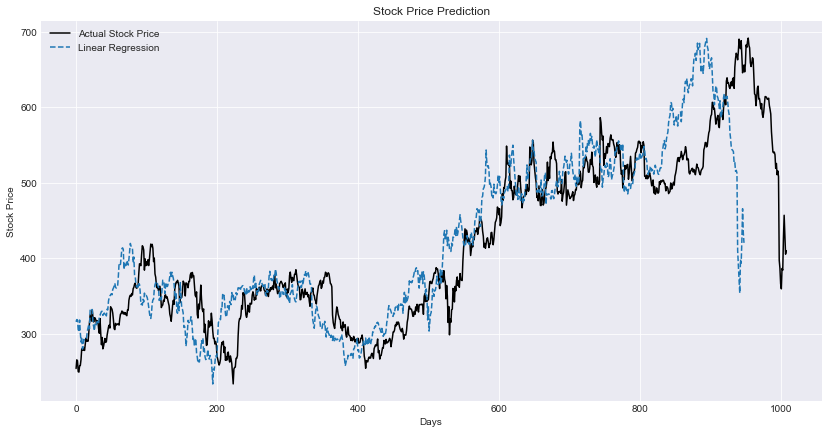

In [37]:
# Printing Evaluation Metrics
print("Linear Regression Model:")
print("Training MAE:", lr_train_mae)
print("Training MSE:", lr_train_mse)
print("Training RMSE:", lr_train_rmse)
print("Test MAE:", lr_test_mae)
print("Test MSE:", lr_test_mse)
print("Test RMSE:", lr_test_rmse)
print()

# Calculate R^2 score
lr_train_r2 = r2_score(y_train, lr_train_prediction)
lr_test_r2 = r2_score(y_test, lr_test_prediction)

# Printing R^2 score
print("Linear Regression Model:")
print("Training R^2 Score:", lr_train_r2)
print("Test R^2 Score:", lr_test_r2)
print()

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(close_prices, label='Actual Stock Price', color='black')
plt.plot(np.concatenate([lr_train_prediction, lr_test_prediction]), label='Linear Regression', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Support Vector Machines (SVM) Model:
Training MAE: 7.242892459754234
Training MSE: 105.66180635432309
Training RMSE: 10.279192884381686
Test MAE: 9.127709623189359
Test MSE: 205.362064129449
Test RMSE: 14.330459313275657

Support Vector Machines (SVM) Model:
Training R^2 Score: 0.9855348517748378
Test R^2 Score: 0.9599343824869339



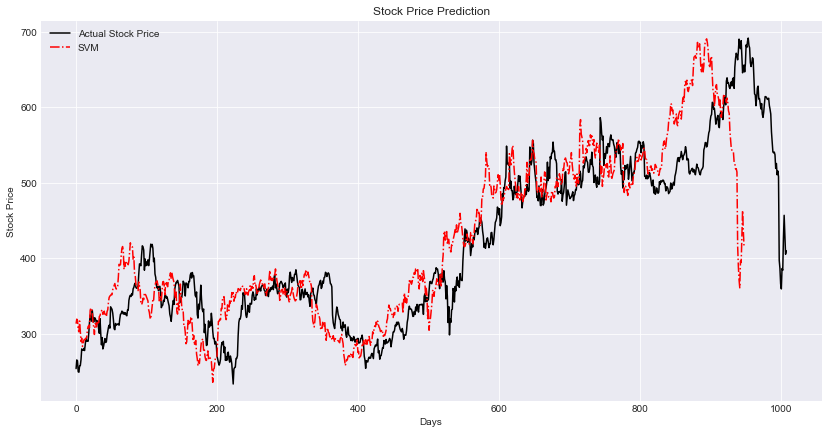

In [38]:
print("Support Vector Machines (SVM) Model:")
print("Training MAE:", svm_train_mae)
print("Training MSE:", svm_train_mse)
print("Training RMSE:", svm_train_rmse)
print("Test MAE:", svm_test_mae)
print("Test MSE:", svm_test_mse)
print("Test RMSE:", svm_test_rmse)
print()

# Calculate R^2 score
svm_train_r2 = r2_score(y_train, svm_train_prediction)
svm_test_r2 = r2_score(y_test, svm_test_prediction)

# Printing R^2 score
print("Support Vector Machines (SVM) Model:")
print("Training R^2 Score:", svm_train_r2)
print("Test R^2 Score:", svm_test_r2)
print()

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(close_prices, label='Actual Stock Price', color='black')
plt.plot(np.concatenate([svm_train_prediction, svm_test_prediction]), label='SVM', linestyle='-.', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Random Forest Model:
Training MAE: 2.8959493091377126
Training MSE: 18.01908406194446
Training RMSE: 4.244889169571387
Test MAE: 43.93783209098845
Test MSE: 3774.945129452502
Test RMSE: 61.440582105417114

Random Forest Model:
Training R^2 Score: 0.9975331793877947
Test R^2 Score: 0.263517785864682



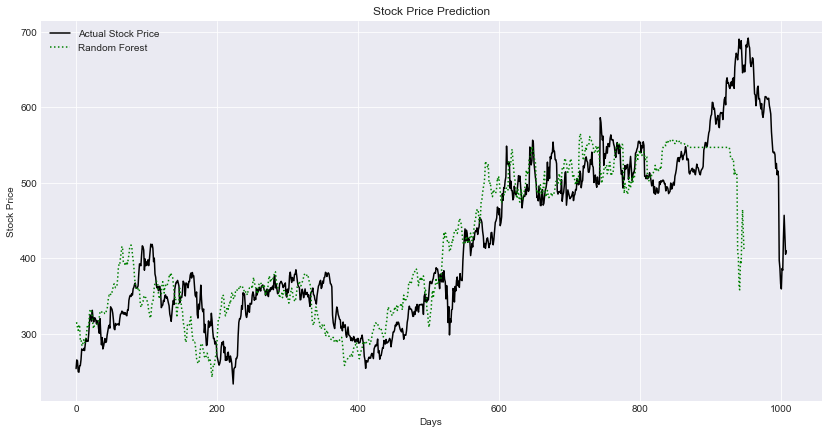

In [39]:
print("Random Forest Model:")
print("Training MAE:", rf_train_mae)
print("Training MSE:", rf_train_mse)
print("Training RMSE:", rf_train_rmse)
print("Test MAE:", rf_test_mae)
print("Test MSE:", rf_test_mse)
print("Test RMSE:", rf_test_rmse)
print()

# Calculate R^2 score
rf_train_r2 = r2_score(y_train, rf_train_prediction)
rf_test_r2 = r2_score(y_test, rf_test_prediction)

# Printing R^2 score
print("Random Forest Model:")
print("Training R^2 Score:", rf_train_r2)
print("Test R^2 Score:", rf_test_r2)
print()

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(close_prices, label='Actual Stock Price', color='black')
plt.plot(np.concatenate([rf_train_prediction, rf_test_prediction]), label='Random Forest', linestyle=':', color='green')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Gradient Boosting Regressor:
Training MAE: 0.00380620679747751
Training MSE: 2.4105453078160663e-05
Training RMSE: 0.004909730448625532
Test MAE: 53.92878666492802
Test MSE: 5308.056466652102
Test RMSE: 72.85640992151687

Gradient Boosting Regressor Model:
Training R^2 Score: 0.9999999966999528
Test R^2 Score: -0.03558834506349906



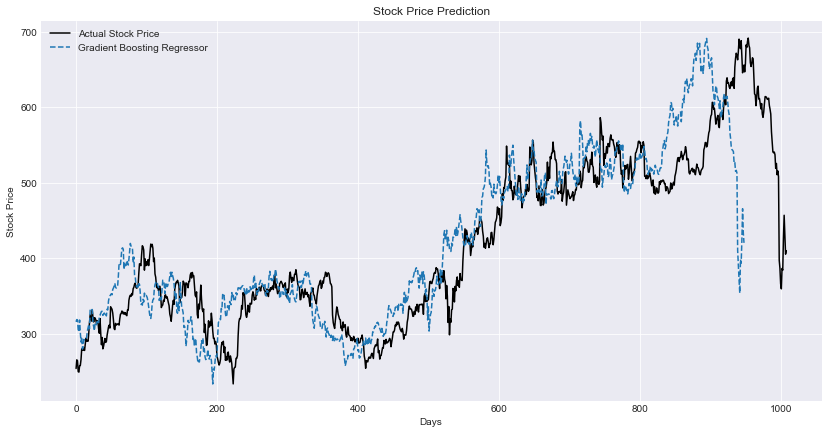

In [40]:
# Printing Evaluation Metrics
print("Gradient Boosting Regressor:")
print("Training MAE:", gb_train_mae)
print("Training MSE:", gb_train_mse)
print("Training RMSE:", gb_train_rmse)
print("Test MAE:", gb_test_mae)
print("Test MSE:", gb_test_mse)
print("Test RMSE:", gb_test_rmse)
print()

# Calculate R^2 score
gb_train_r2 = r2_score(y_train, gb_train_prediction)
gb_test_r2 = r2_score(y_test, gb_test_prediction)

# Printing R^2 score
print("Gradient Boosting Regressor Model:")
print("Training R^2 Score:", gb_train_r2)
print("Test R^2 Score:", gb_test_r2)
print()

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(close_prices, label='Actual Stock Price', color='black')
plt.plot(np.concatenate([lr_train_prediction, lr_test_prediction]), label='Gradient Boosting Regressor', linestyle='--')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

XGBoost Model:
Training MAE: 0.0005865029372282217
Training MSE: 8.184248464831893e-07
Training RMSE: 0.0009046683627071245
Test MAE: 55.029378870185326
Test MSE: 5936.847947434151
Test RMSE: 77.05094384518694

XGBoost Model:
Training R^2 Score: 0.9999999998879573
Test R^2 Score: -0.15826396712292579



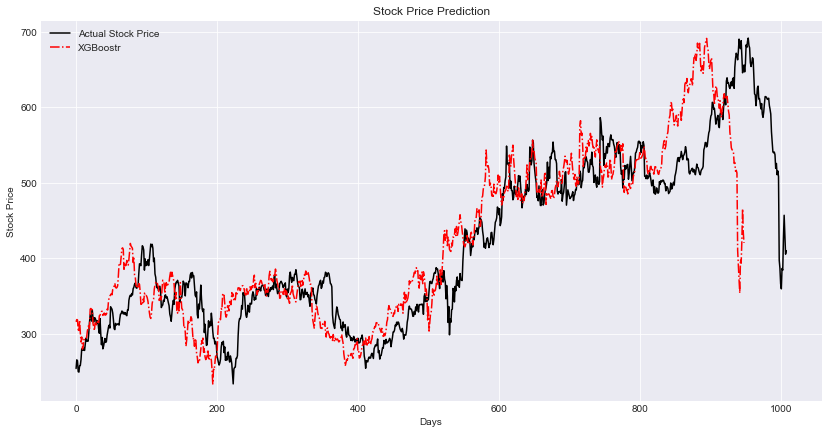

In [41]:
# Printing Evaluation Metrics
print("XGBoost Model:")
print("Training MAE:", xgb_train_mae)
print("Training MSE:", xgb_train_mse)
print("Training RMSE:", xgb_train_rmse)
print("Test MAE:", xgb_test_mae)
print("Test MSE:", xgb_test_mse)
print("Test RMSE:", xgb_test_rmse)
print()

# Calculate R^2 score
xgb_train_r2 = r2_score(y_train, xgb_train_prediction)
xgb_test_r2 = r2_score(y_test, xgb_test_prediction)

# Printing R^2 score
print("XGBoost Model:")
print("Training R^2 Score:", xgb_train_r2)
print("Test R^2 Score:", xgb_test_r2)
print()

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(close_prices, label='Actual Stock Price', color='black')
plt.plot(np.concatenate([lr_train_prediction, lr_test_prediction]), label='XGBoostr', linestyle='-.', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

LightGBM Model:
Training MAE: 2.561921555719899
Training MSE: 13.319736248409336
Training RMSE: 3.64962138425472
Test MAE: 47.44178195984305
Test MSE: 4288.988923003576
Test RMSE: 65.49037275053163

LightGBM Model:
Training R^2 Score: 0.9981765221909304
Test R^2 Score: 0.16322914636015995



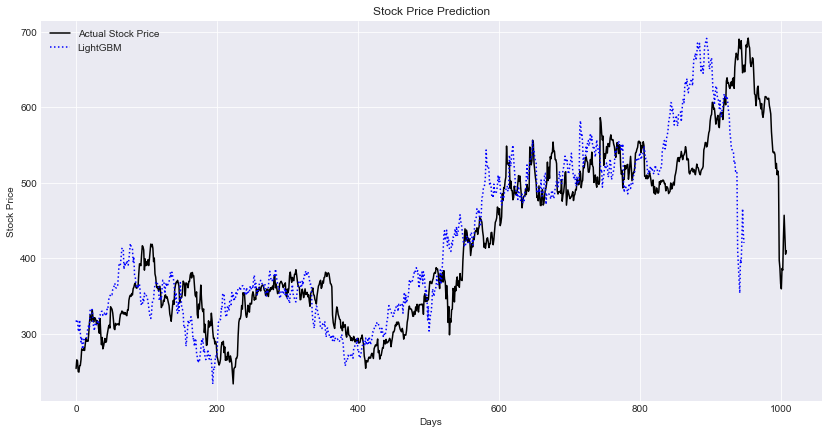

In [42]:
# Printing Evaluation Metrics
print("LightGBM Model:")
print("Training MAE:", lgbm_train_mae)
print("Training MSE:", lgbm_train_mse)
print("Training RMSE:", lgbm_train_rmse)
print("Test MAE:", lgbm_test_mae)
print("Test MSE:", lgbm_test_mse)
print("Test RMSE:", lgbm_test_rmse)
print()

# Calculate R^2 score
lgbm_train_r2 = r2_score(y_train, lgbm_train_prediction)
lgbm_test_r2 = r2_score(y_test, lgbm_test_prediction)

# Printing R^2 score
print("LightGBM Model:")
print("Training R^2 Score:", lgbm_train_r2)
print("Test R^2 Score:", lgbm_test_r2)
print()

# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(close_prices, label='Actual Stock Price', color='black')
plt.plot(np.concatenate([lr_train_prediction, lr_test_prediction]), label='LightGBM', linestyle=':', color="blue")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()